In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

In [93]:
N = 10              # training samples
poly_order = 11      # polynomial order
M = 100             # testing samples
lagrangian = 0.1   # lambda, regularization parameter

# Generating training samples

In [94]:
# Generate equispaced floats in the interval [0, 2*pi]
x_train = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(x_train)
# Add noise
y += np.random.normal(mean, std, N)
#defining it as a matrix
y_train = np.asmatrix(y.reshape(N,1))

# adding the bias and higher order terms to x

In [95]:
x = x_train.reshape((N,1))
for i in range(0,poly_order-1):
	x = np.append(x,(x_train.reshape((N,1)))**(i+2),axis = 1)
x = np.asmatrix(x)
print(x.shape)
# print(x)

(10, 11)


# finding the optimum weights

In [96]:
w = (x.T*x + lagrangian * np.eye(poly_order)).I*x.T*y_train
print(w)

[[ 6.83742250e-01]
 [ 2.60885020e-01]
 [-2.50352775e-02]
 [-1.26902835e-01]
 [-4.02642829e-02]
 [ 6.85613670e-02]
 [-2.62641572e-02]
 [ 4.84170450e-03]
 [-4.50640788e-04]
 [ 1.71990544e-05]
 [-2.22612517e-08]]


# generating test samples

In [97]:
x_test = np.linspace(0, 2*np.pi, M)
x = x_test.reshape(M,1)
for i in range(0,poly_order-1):
	x = np.append(x,(x_test.reshape((M,1)))**(i+2),axis = 1)
x = np.asmatrix(x)

# predicting the outputs for the test sample

In [98]:
y_test = x*w

# ploting the results

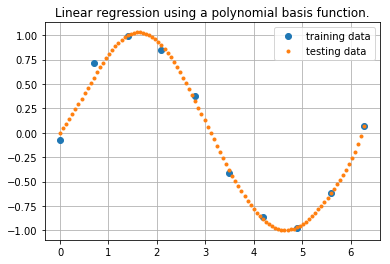

In [99]:
plt.plot(x_train,y_train,'o',label = 'training data')
plt.plot(x_test,y_test,'.',label = 'testing data')
plt.legend()
plt.grid()
plt.title("Linear regression using a polynomial basis function.")
plt.show()

# Observations

- Regularisation has been implemented (legrangian multiplier = λ)
- Noise is added to the training data labels
- Unlike the normal polynomial basis,by adding the regularisation even for the polynomial order of 11, the model is still performance of the model is still good
- when the legrangian = 0 , same curve as the Q2, observed
- Its observed that the problem of overfit is almost solved for linear regression